<a href="https://colab.research.google.com/github/nehamahanand07/RNN_LSTM_1/blob/main/RNN_LSTM_1_milk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df=pd.read_csv('/content/monthly_milk_production.csv',index_col='Date',parse_dates=True)
df


,Production
Date,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727
...,...
1975-08-01,858
1975-09-01,817
1975-10-01,827


<Axes: xlabel='Date'>

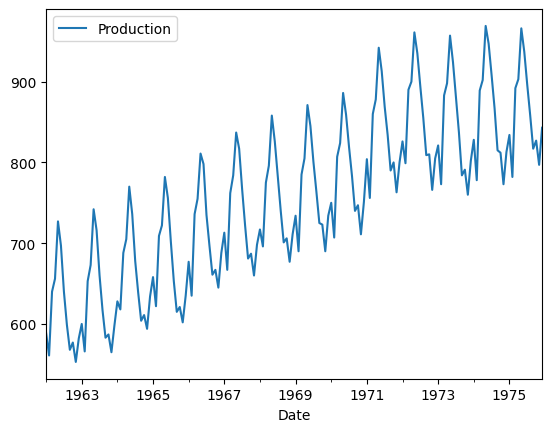

In [ ]:
df.plot()

In [ ]:
df.dtypes

,0
Production,int64


In [ ]:
df.columns

Index(['Production'], dtype='object')

In [ ]:
#last 1 year test, others as train (168-12=156)
train=df.iloc[:156]
test=df.iloc[156:]

In [ ]:
train

,Production
Date,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727
...,...
1974-08-01,867
1974-09-01,815
1974-10-01,812


In [ ]:
train.shape

(156, 1)

In [ ]:
test.shape

(12, 1)

In [ ]:
#normalization
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(train)
scaled_train=scaler.transform(train)
scaled_test=scaler.transform(test)

In [ ]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [ ]:
n_inputs=12
n_features=1
generator=TimeseriesGenerator(scaled_train,scaled_train,length=n_inputs,batch_size=1)


In [ ]:
generator[0]

(array([[[0.08653846],
         [0.01923077],
         [0.20913462],
         [0.24759615],
         [0.41826923],
         [0.34615385],
         [0.20913462],
         [0.11057692],
         [0.03605769],
         [0.05769231],
         [0.        ],
         [0.06971154]]]),
 array([[0.11298077]]))

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,LSTM

In [ ]:
model=Sequential()
model.add(LSTM(100,activation='relu',input_shape=(12,1)))
model.add(Dense(1))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(optimizer='adam',loss='mse') #regression so loss=mse

In [ ]:
#fitting
r=model.fit(generator,epochs=10)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


144/144 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.1213
Epoch 2/10
144/144 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0267
Epoch 3/10
144/144 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0217
Epoch 4/10
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0147
Epoch 5/10
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0060
Epoch 6/10
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0069
Epoch 7/10
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0044
Epoch 8/10
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0034
Epoch 9/10
144/144 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0053
Epoch 10/10
144/144 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0025


In [ ]:
r.history

{'loss': [0.055728163570165634,
  0.02509324625134468,
  0.019428085535764694,
  0.012254315428435802,
  0.005968236364424229,
  0.005873219575732946,
  0.004866759292781353,
  0.005724417977035046,
  0.004347866401076317,
  0.0030488325282931328]}

In [ ]:
#prediction
#for testing scaled_test is used
#predicted ans corresp to this 0.67548077 is training data last 12
#                               0.55048077 is training data last 11+0.6548077
scaled_test

array([[0.67548077],
       [0.55048077],
       [0.81490385],
       [0.84134615],
       [0.99278846],
       [0.92307692],
       [0.82451923],
       [0.73317308],
       [0.63461538],
       [0.65865385],
       [0.58653846],
       [0.69711538]])

In [ ]:
last_train_batch=scaled_train[-12:]
last_train_batch

array([[0.66105769],
       [0.54086538],
       [0.80769231],
       [0.83894231],
       [1.        ],
       [0.94711538],
       [0.85336538],
       [0.75480769],
       [0.62980769],
       [0.62259615],
       [0.52884615],
       [0.625     ]])

In [ ]:
last_train_batch=last_train_batch.reshape(1,12,1)  #we add 1 dimension in prediction(for format matching)
model.predict(last_train_batch)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


array([[0.65648097]], dtype=float32)

In [ ]:
test_prediction=[]
first_eval_batch=scaled_train[-12:]
current_batch=first_eval_batch.reshape(1,12,1)
for i in range(len(scaled_test)):
  current_pred=model.predict(current_batch)[0]
  test_prediction.append(current_pred)
  current_batch=np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


In [ ]:
test_prediction

[array([0.65648097], dtype=float32),
 array([0.7070804], dtype=float32),
 array([0.8594479], dtype=float32),
 array([0.96811885], dtype=float32),
 array([1.052577], dtype=float32),
 array([1.0547701], dtype=float32),
 array([0.99353683], dtype=float32),
 array([0.86841506], dtype=float32),
 array([0.75845486], dtype=float32),
 array([0.6752839], dtype=float32),
 array([0.6529859], dtype=float32),
 array([0.6780567], dtype=float32)]

In [ ]:
test

,Production
Date,
1975-01-01,834
1975-02-01,782
1975-03-01,892
1975-04-01,903
1975-05-01,966
1975-06-01,937
1975-07-01,896
1975-08-01,858
1975-09-01,817


In [ ]:
true_prediction=scaler.inverse_transform(test_prediction)
true_prediction

array([[826.09608269],
       [847.14545631],
       [910.53032494],
       [955.73744011],
       [990.87203979],
       [991.78436661],
       [966.31132126],
       [914.26066399],
       [868.51722145],
       [833.91810608],
       [824.64212227],
       [835.07159424]])

In [ ]:
test['true_prediction']=true_prediction
test

<ipython-input-296-ab6087c3380b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['true_prediction']=true_prediction


,Production,true_prediction
Date,,
1975-01-01,834,826.096083
1975-02-01,782,847.145456
1975-03-01,892,910.530325
1975-04-01,903,955.737440
1975-05-01,966,990.872040
1975-06-01,937,991.784367
1975-07-01,896,966.311321
1975-08-01,858,914.260664
1975-09-01,817,868.517221


<Axes: xlabel='Date'>

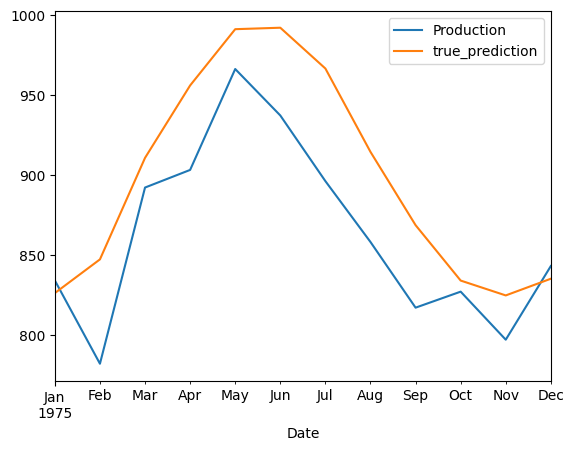

In [ ]:
test.plot()

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error,r2_score
mape=mean_absolute_percentage_error(test['Production'],test['true_prediction'])
mape

0.042977409754419466

In [ ]:
r2=r2_score(test['Production'],test['true_prediction'])
r2

0.35559237814393907